In [1]:
%config InlineBackend.figure_formats={'retina', 'pdf'}
%config InlineBackend.figure_dpi = 72

# The Dias (2000) model

## Introduction

The model proposed by [Dias (1972)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB077i026p04945)
describes the petrophysical properties of rocks from measurements of their
electrical polarization in a frequency range typically from
1 mHz to 100 kHz.

We refer to [Dias (2000)](https://library.seg.org/doi/10.1190/1.1444738)
for the implementation of the complex resistivity formula in BISIP. This model
predicts that the complex resistivity spectra $\rho^*$ of a
polarizable rock sample can be described by

\begin{equation}
\rho^* = \rho_0 \left[ 1-m\left(1-\frac{1}{1+i\omega\tau'(1+\frac{1}{\mu})} \right) \right],
\end{equation}

where $\omega$ is the measurement angular frequencies
($\omega=2\pi f$) and $i$ is the imaginary unit. Additionally,

\begin{equation}
    \mu = i\omega\tau + \left(i\omega\tau''\right)^{1/2}, \\
    \tau' = (\tau/\delta)(1 - \delta)/(1 - m), \\
    \tau'' = \tau^2 \eta^2.
\end{equation}

Here, $\rho^*$ depends on 5 parameters:

- $\rho_0 \in [0, \infty)$, the direct current resistivity $\rho_0 = \rho^*(\omega\to 0)$.
- $m \in [0, 1)$, the chargeability $m=(\rho_0 - \rho_\infty)/\rho_0$.
- $\tau \in [0, \infty)$, the relaxation time, related to
  average polarizable particle size.
- $\eta \in [0, 150]$, characteristic of the
  electrochemical environment producing polarization.
- $\delta \in [0, 1)$, the pore length fraction of the electrical double
  layer zone in the material.

In this tutorial we will invert a SIP data with the Dias model to explore the
parameter space of this semi-empirical SIP model. We will also quantify the
relationship between the various parameters.

## Exploring the parameter space

First import the required packages.

In [2]:
import os

import numpy as np
import bisip
from bisip import Dias2000

from IPython.display import display, Math

np.random.seed(42)

# Define this utility function to nicely print parameter values 
# for the Dias model with LaTeX
def print_dias_parameters(names, values, uncertainties):
    for n, v, u in zip(names, values, uncertainties):
        txt = '{0}: {1:.3f} \pm {2:.3f}'
        n = '\\'+n.replace('_', '\\')
        n = n.replace('\\r0', '\\rho_0')
        n = n.replace('\\m', 'm')
        txt = txt.format(n, v, u)
        display(Math(txt))

In [3]:
# This will get one of the example data files in the BISIP package
fp = f'data/SIP-K389172.dat'
fp = os.path.join(os.path.dirname(bisip.__file__), fp)

# Define MCMC parameters and Dias model
nwalkers = 32
nsteps = 1000
model = Dias2000(filepath=fp, nwalkers=nwalkers, nsteps=nsteps)
# Fit model to data
model.fit()

  0%|          | 0/1000 [00:00<?, ?it/s]

  7%|▋         | 67/1000 [00:00<00:01, 660.64it/s]

 13%|█▎        | 132/1000 [00:00<00:01, 655.06it/s]

 20%|█▉        | 195/1000 [00:00<00:01, 644.95it/s]

 26%|██▌       | 259/1000 [00:00<00:01, 642.22it/s]

 32%|███▏      | 322/1000 [00:00<00:01, 636.75it/s]

 38%|███▊      | 380/1000 [00:00<00:01, 617.69it/s]

 44%|████▍     | 440/1000 [00:00<00:00, 609.60it/s]

 50%|█████     | 504/1000 [00:00<00:00, 617.04it/s]

 56%|█████▋    | 565/1000 [00:00<00:00, 614.60it/s]

 63%|██████▎   | 626/1000 [00:01<00:00, 612.31it/s]

 69%|██████▊   | 687/1000 [00:01<00:00, 611.59it/s]

 75%|███████▍  | 747/1000 [00:01<00:00, 605.64it/s]

 81%|████████  | 810/1000 [00:01<00:00, 611.14it/s]

 87%|████████▋ | 871/1000 [00:01<00:00, 610.74it/s]

 93%|█████████▎| 933/1000 [00:01<00:00, 613.38it/s]

100%|█████████▉| 997/1000 [00:01<00:00, 620.87it/s]

100%|██████████| 1000/1000 [00:01<00:00, 618.43it/s]

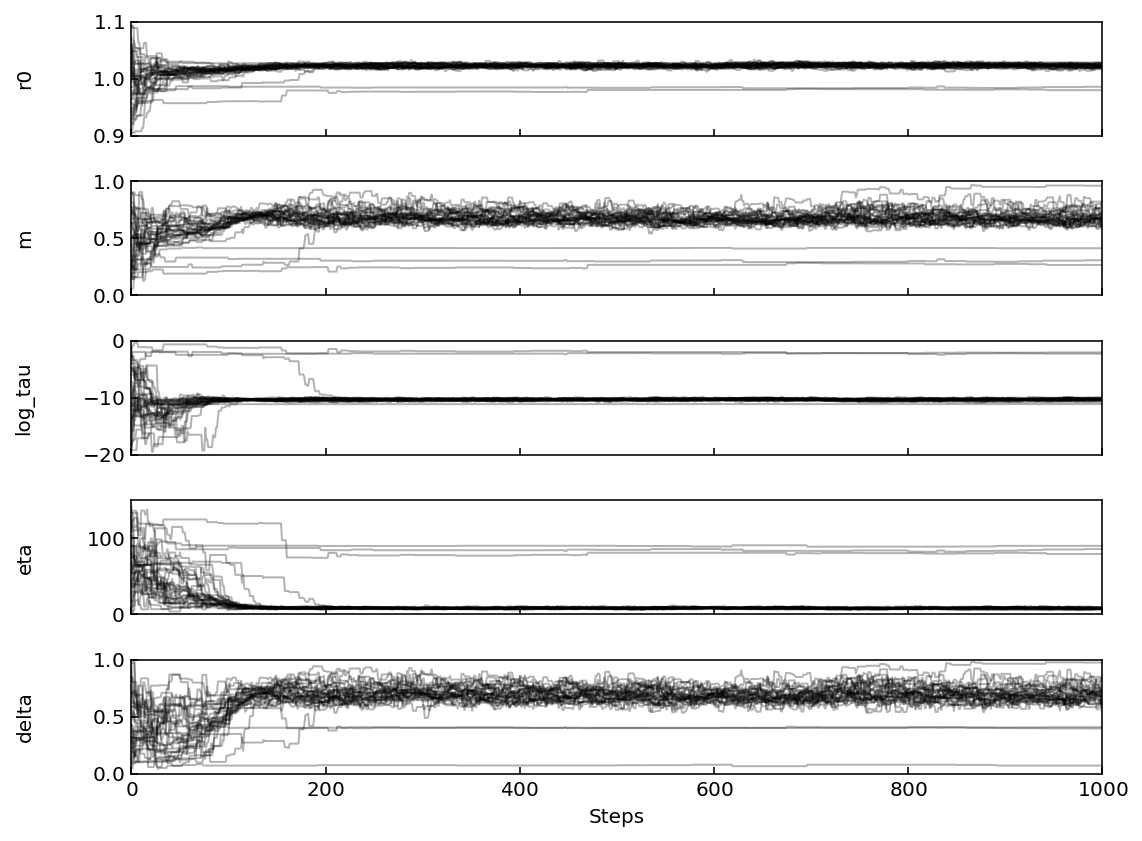

In [4]:
fig = model.plot_traces()

Some walkers get stuck in local minima because the priors are really wide. Nevertheless, we can see that the median solution of all these chains gives a satisfying result.

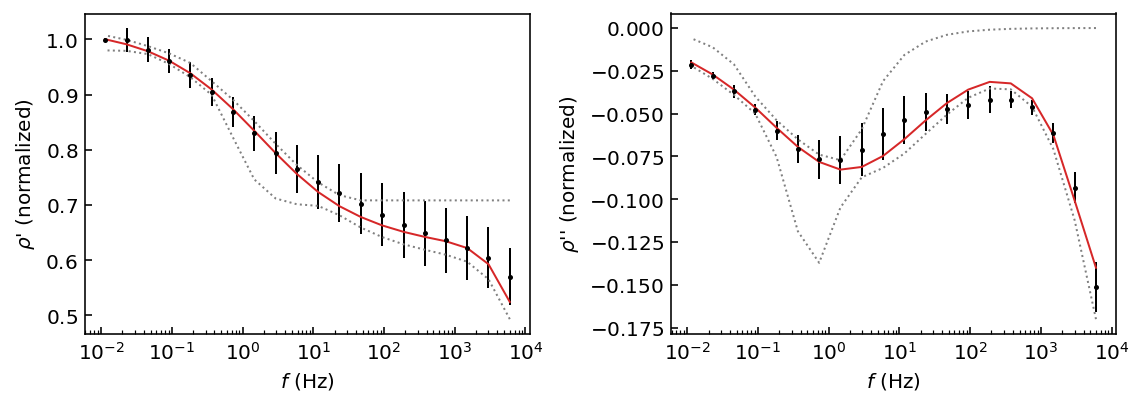

In [5]:
# Plot the fit by discarding the first 500 steps
fig = model.plot_fit(discard=500)

  0%|          | 0/1000 [00:00<?, ?it/s]

  6%|▌         | 59/1000 [00:00<00:01, 588.37it/s]

 12%|█▏        | 117/1000 [00:00<00:01, 584.44it/s]

 17%|█▋        | 174/1000 [00:00<00:01, 577.74it/s]

 23%|██▎       | 231/1000 [00:00<00:01, 573.66it/s]

 29%|██▊       | 287/1000 [00:00<00:01, 568.87it/s]

 34%|███▍      | 342/1000 [00:00<00:01, 562.67it/s]

 40%|████      | 402/1000 [00:00<00:01, 571.89it/s]

 46%|████▌     | 460/1000 [00:00<00:00, 573.40it/s]

 52%|█████▏    | 517/1000 [00:00<00:00, 571.99it/s]

 58%|█████▊    | 576/1000 [00:01<00:00, 575.90it/s]

 64%|██████▎   | 635/1000 [00:01<00:00, 580.00it/s]

 69%|██████▉   | 692/1000 [00:01<00:00, 573.85it/s]

 75%|███████▌  | 750/1000 [00:01<00:00, 574.63it/s]

 81%|████████  | 807/1000 [00:01<00:00, 572.89it/s]

 86%|████████▋ | 865/1000 [00:01<00:00, 573.55it/s]

 92%|█████████▏| 923/1000 [00:01<00:00, 572.40it/s]

 98%|█████████▊| 983/1000 [00:01<00:00, 577.94it/s]

100%|██████████| 1000/1000 [00:01<00:00, 572.89it/s]

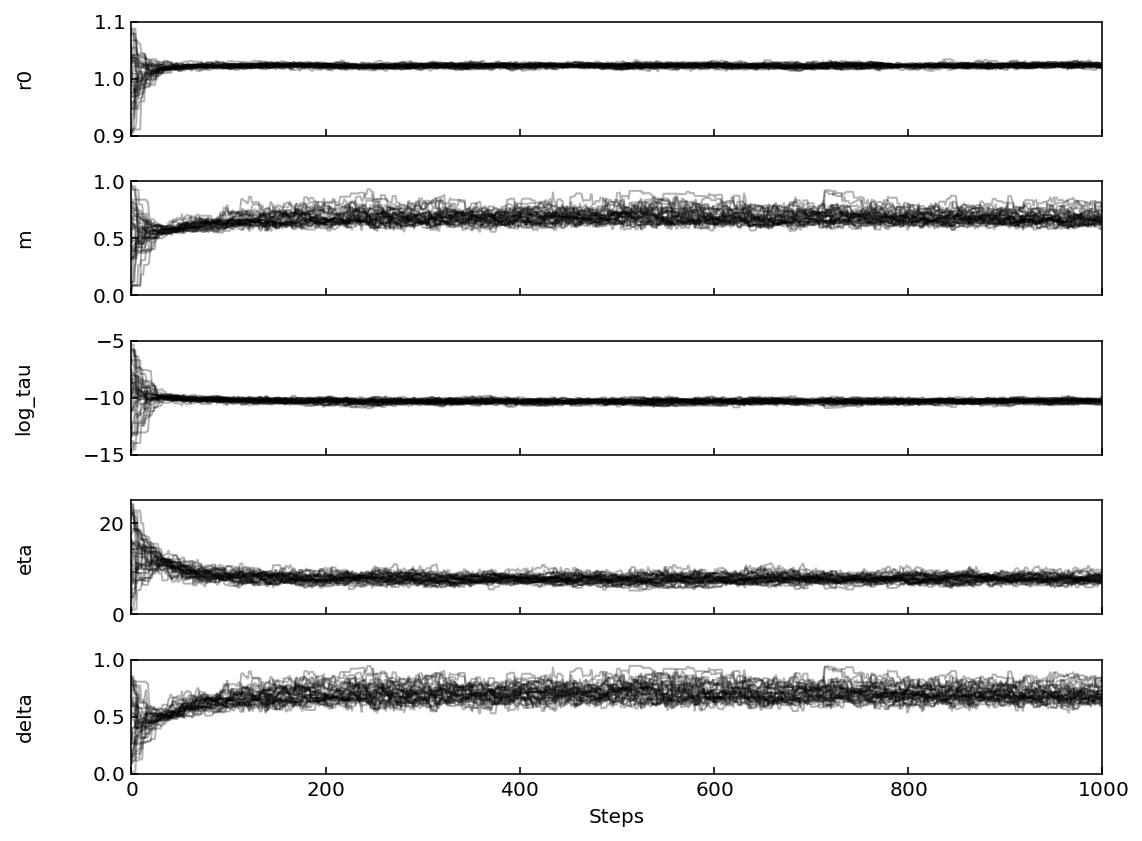

In [6]:
# Adjust the boundaries
model.params.update(eta=[0, 25], log_tau=[-15, -5])
model.p0 = None  # here we reset the randomly selected initial values

model.fit()
fig = model.plot_traces()

The stricter priors have allowed all walkers to find a similar stationary state. With these improved parameter chains the fit quality should be improved.

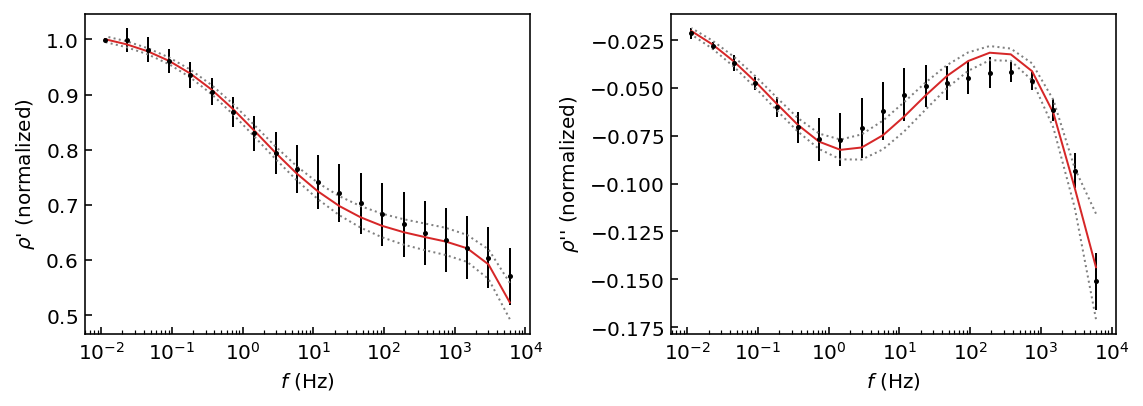

In [7]:
# Plot the fit by discarding the first 500 steps
fig = model.plot_fit(discard=500)

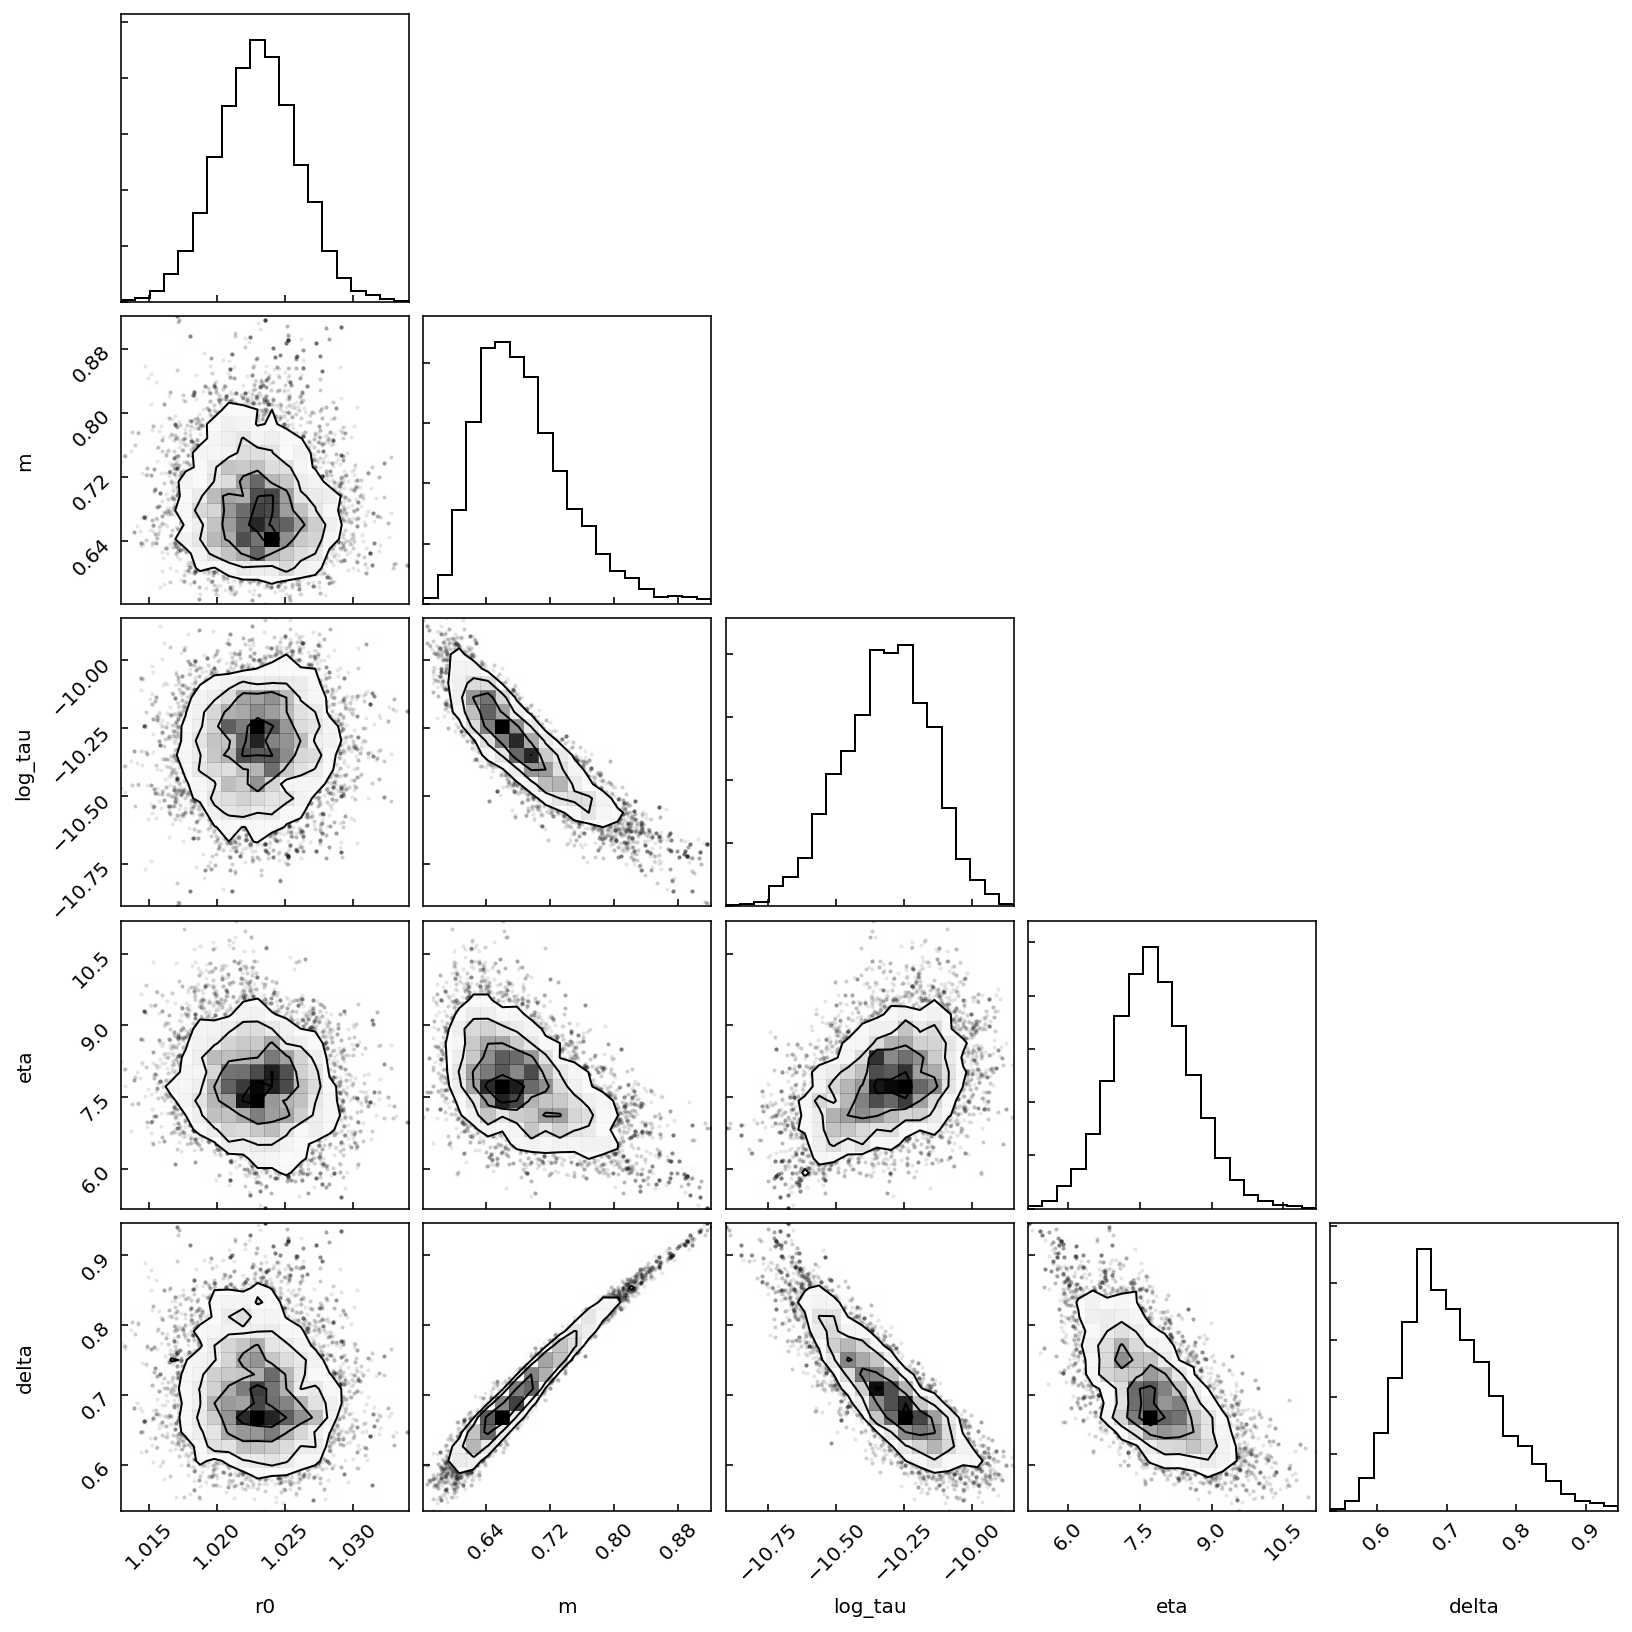

In [8]:
# Plot the posterior by discarding the first 500 steps
fig = model.plot_corner(discard=500)

In [9]:

# Print the mean and std of the parameters after discarding burn-in samples
values = model.get_param_mean(discard=500)
uncertainties = model.get_param_std(discard=500)

print_dias_parameters(model.param_names, values, uncertainties)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Conclusions